## Chapter 18 - Feature Interaction with xgbfir

- If there aren't that many variables, its easy enough to just look at the xlsx file.
- The key is that, if trees often split feature A then feature B, then maybe there are some key interactions in A and B
- If A commonly splits with itself (A to A), then there are non-constrant relations between A and the output in the data.
- A very nice feature of regression and classification trees is how easily they incorporate interactions and non-constrant relations.
- interestingly, perhaps the worst case for a tree is a perfectly linear relationship?

In [1]:
from setup import * #gets the real data

/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:32: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjExt/effective-xgboost-notes/setup.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df_.Q4.replace({'Master’s degree': 18,
/media/ryan/5e52f95b-dbda-4605-bec6-10d513d58772/GitHubProjEx

In [23]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing, ensemble
import xgboost as xgb
import seaborn as sns
import dtreeviz
from yellowbrick.model_selection import validation_curve
import xgbfir
import seaborn.objects as so
# note, openpyxl is a dependency for this chapter
#also, must install graphviz for plotting to work with xgb

In [3]:
xgb_def = xgb.XGBClassifier()
xgb_def.fit(X_train, y_train)
xgbfir.saveXgbFI(xgb_def, feature_names=X_train.columns, OutputXlsxFile='fir.xlsx')

In [5]:
fir = pd.read_excel('fir.xlsx')
print(fir
.sort_values(by='Average Rank') #note, rank isn't 
.head()
.round(1))

    Interaction   Gain  FScore  wFScore  Average wFScore  Average Gain  \
0             r  555.7      91     23.9              0.3           6.1   
4     education  297.7     225     73.6              0.3           1.3   
1     years_exp  523.2     534     93.9              0.2           1.0   
2  compensation  467.5     650    125.3              0.2           0.7   
3      major_cs  334.5      88     12.5              0.1           3.8   

   Expected Gain  Gain Rank  FScore Rank  wFScore Rank  Avg wFScore Rank  \
0          507.3          1            7             6                 5   
4           77.5          5            4             4                 3   
1           82.1          2            2             3                 9   
2           52.0          3            1             2                 7   
3          166.7          4            8            10                10   

   Avg Gain Rank  Expected Gain Rank  Average Rank  Average Tree Index  \
0              1        

In [6]:
pd.read_excel('fir.xlsx', sheet_name='Interaction Depth 1').iloc[:20] #first 20 rows

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,major_cs|r,1191.559177,12,4.088080,0.340673,99.296598,588.780737,1,52,24,9,1,1,14.666667,9.916667,1.666667
1,education|years_exp,584.654399,99,20.131816,0.203352,5.905600,98.800390,2,5,8,21,9,3,8.000000,28.121212,3.626263
2,major_cs|years_exp,472.311385,37,4.853291,0.131170,12.765173,116.494424,3,20,21,39,3,2,14.666667,31.891892,3.108108
3,compensation|years_exp,387.389509,262,43.330536,0.165384,1.478586,36.892712,4,1,2,31,58,7,17.166667,46.664122,3.698473
4,age|compensation,295.014771,212,41.741564,0.196894,1.391579,27.323278,5,2,3,22,64,10,17.666667,48.985849,3.636792
5,age|years_exp,263.945773,210,54.196599,0.258079,1.256885,36.166785,6,3,1,13,72,8,17.166667,40.528571,3.576190
6,Q3_United States of America|years_exp,208.143431,33,2.389494,0.072409,6.307377,28.715051,7,22,41,73,8,9,26.666667,40.303030,4.333333
7,education|major_cs,184.761180,18,3.468031,0.192668,10.264510,63.316905,8,41,32,23,5,5,19.000000,32.777778,3.388889
8,compensation|education,161.244570,80,20.308274,0.253853,2.015557,19.287296,9,6,7,15,37,12,14.333333,43.112500,3.825000
9,compensation|compensation,157.929002,113,20.401352,0.180543,1.397602,16.262643,10,4,6,27,63,14,20.666667,43.212389,4.141593


In [7]:
(pd.read_excel('fir.xlsx', sheet_name='Interaction Depth 1')
.iloc[:20] #first 20 rows. I don't see why the author limited it here.
.sort_values(by='Average Rank') #ranking over first 20
.head(10) #looking at top 10 among ranked
.round(1)
)

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
1,education|years_exp,584.7,99,20.1,0.2,5.9,98.8,2,5,8,21,9,3,8.0,28.1,3.6
8,compensation|education,161.2,80,20.3,0.3,2.0,19.3,9,6,7,15,37,12,14.3,43.1,3.8
0,major_cs|r,1191.6,12,4.1,0.3,99.3,588.8,1,52,24,9,1,1,14.7,9.9,1.7
2,major_cs|years_exp,472.3,37,4.9,0.1,12.8,116.5,3,20,21,39,3,2,14.7,31.9,3.1
11,education|r,131.2,12,5.1,0.4,10.9,92.6,12,53,18,6,4,4,16.2,33.8,2.2
12,age|education,115.2,77,30.0,0.4,1.5,24.2,13,7,5,7,57,11,16.7,42.1,3.3
3,compensation|years_exp,387.4,262,43.3,0.2,1.5,36.9,4,1,2,31,58,7,17.2,46.7,3.7
5,age|years_exp,263.9,210,54.2,0.3,1.3,36.2,6,3,1,13,72,8,17.2,40.5,3.6
4,age|compensation,295.0,212,41.7,0.2,1.4,27.3,5,2,3,22,64,10,17.7,49.0,3.6
7,education|major_cs,184.8,18,3.5,0.2,10.3,63.3,8,41,32,23,5,5,19.0,32.8,3.4


In [12]:
def harmonic_mean(l) -> float:
    x = 0
    for items in l:
        x += 1/items
    #
    return len(l)/x

mean_test =  [ [1,2,3,4,5,6,7,8,9,10],
  [1,2,3, 8,9,10],
  [1, 10],
  [60,70,80,90,100],
  [60, 100]
]

list(map(harmonic_mean, mean_test))

<Axes: >

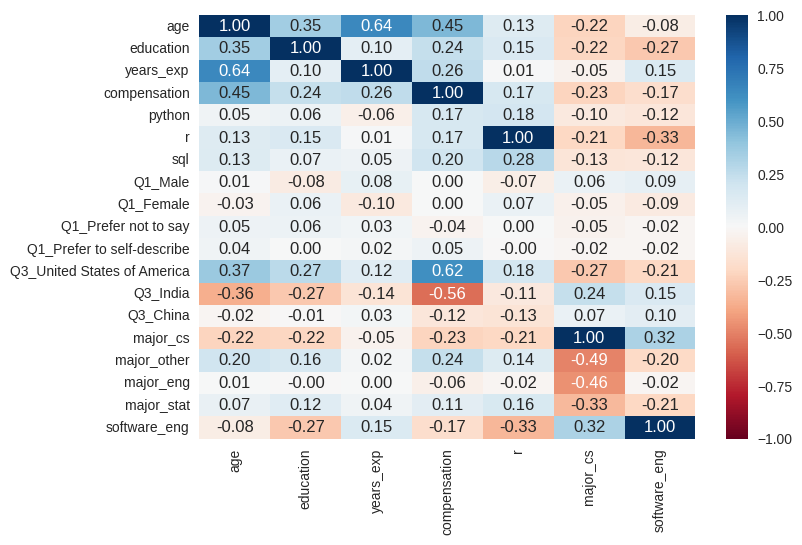

In [25]:
sns.heatmap(X_train
    .assign(software_eng=y_train)
    .corr(method='spearman')
    .loc[:, ['age','education','years_exp','compensation','r','major_cs','software_eng']],
    cmap='RdBu', annot=True, fmt='.2f', vmin=-1, vmax=1)
